# Рабочая тетрадь №6

## студентки БББО-05-20 Гуровой Ольги

## Теоретический материал – Эволюционные методы
Деревья решений являются одним из наиболее эффективных Эволюционные методы.

Эволюционные методы относятся к числу эффективных средств решения задач оптимизации и структурного синтеза проектных решений. Они основаны на использовании принципов оптимального приспособления организмов в живой природе к условиям окружающей среды. К числу эволюционных относятся методы генетические, колонии муравьев, поведения толпы. Наиболее развиты и востребованы в настоящее время генетические алгоритмы. По мере развития техники и технологий растет доля сложных задач проектирования и управления, для решения которых применение традиционных методов проблематично. Поэтому все большее внимание уделяется применению методов искусственного интеллекта.  
Генетические алгоритмы.  
Для применения ГА необходимо:
1.	выделить совокупность свойств объекта, характеризуемых внутренними параметрами и влияющих на его полезность, т.е. выделить множество управляемых параметров  X=(x_1,x_2,…,x_n), среди x_i могут быть величины различных типов (real, integer, Boolean, enumeration). Наличие нечисловых величин (enumeration) обусловливает возможность решения задач не только параметрической, но и структурной оптимизации;
2.	сформулировать количественную оценку полезности вариантов объекта — функцию полезности F. Если в исходном виде задача многокритериальна, то такая формулировка означает выбор скалярного (обобщенного) критерия;
3.	представить вектор X в форме хромосомы — записи следующего вида:
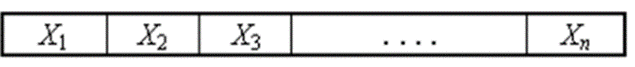
Этапы генетического алгоритма могут быть представлены в следующем виде:  
``` python
for (k=0; k<G; k++)
{ for (j=0; j<N; j++)
  { Выбор родительской пары хромосом;
    Кроссовер;
    Мутации;
    Оценка функции полезности F потомков;
    Селекция;
  }
  Замена текущего поколения новым;
}
```

**1.1.1 Пример**

***Задача:***

Пусть дана начальная популяция из четырех хромосом с двумя генами x и y. Показатель качества хромосомы оценивается функцией Z. При равном качестве хромосом предпочтение отдается хромосоме с большим номером. На каждом этапе хромосома a с высшим качеством порождает четыре новых хромосомы b1, c1, b2, c2, обмениваясь генами с двумя хромосомами b и c более низкого качества по указанной схеме:
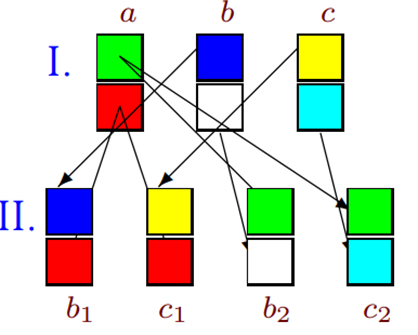 
Последняя хромоcома (с низшим качеством) выбывает из популяции. Найти максимальный показатель качества хромосомы в популяции и общее качество популяции после четырех этапов эволюции.


***Решение:***

Потребуется несколько функций для реализации алгоритма. Напишем их.  
Начнем с функции оценки качества хромосомы qZ(x,y):

In [1]:
# функция качества хромосомы
def qZ(x, y):
    return (x - 3 * y + 1) / (3 * x ** 2 + 3 * y ** 2 + 1)

Далее, оценим суммарное качество хромосом:

In [2]:
# сумма качества хромосом
def qSumZ(Z):
    return sum(Z)

И запрограммируем представленную выше схему обмена хромосомами:

In [3]:
def exchangeScheme(oldX, oldY, sortedId):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]
    
    X[2] = oldX[sortedId[2]] 
    X[3] = oldX[sortedId[2]]

    X[0] = oldX[sortedId[0]]
   
    X[1] = oldX[sortedId[1]]

    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]

    Y[2] = oldY[sortedId[0]]

    Y[3] = oldY[sortedId[1]]

    return X, Y

Отсортируем массив качества наших потомков и выделим полученные индексы:

In [4]:
def sorting(Z):
    sortedId = sorted(range(len(Z)), key = lambda k: Z[k])
    return sortedId

Напишем функцию для шага эволюции:

In [5]:
# шаг эволюции
def evoStep(X, Y, Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]

    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)
    
    return X, Y, Z

Произведем эволюционные изменения, в соответствии с задачей - 4 шага:

In [6]:
# шаги эволюции (конечная функция), по умолчанию 4 шага
def evoSteps(X, Y, stepsNum = 4):
    results = []
    
    for i in range(stepsNum):
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]
       
        X, Y, Z = evoStep(X, Y, arrZ)
        
        X, Y = exchangeScheme(X, Y, sorting(Z))

        results.append([X, Y, qSumZ(arrZ), arrZ])

    return X, Y, results

Теперь, когда мы подготовились к решению задачи, написав все необходимые функции для реализации генетического алгоритма (оценки качества хромосом, сортировки потомков и эволюционных шагов), решим задачу в числах. Пусть даны следующие массивы хромосом X и Y:
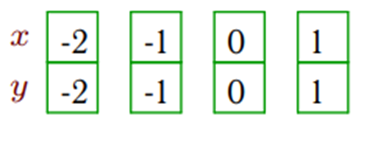
Запишем их в требуемом виде и воспользуемся написанной функцией evoSteps.

In [7]:
# Объявление массивов хромосом
X = [-2, -1, 0, 1]
Y = [-2, -1, 0, 1]
# Реализация алгоритма
results= evoSteps(X, Y)

Теперь, выведем полученные значения для показателя качества хромосомы в популяции и общее качество популяции после четырех этапов эволюции. Для этого, воспользуемся циклом по значениям переменной results.

In [8]:
for i in range(len(results[2])):
    print(f'max_{i + 1}_step: {results[2][i][2]}')

qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]

print(f'max Z: {max(qualityArrZ)}')

max_1_step: 1.4857142857142858
max_2_step: 1.4615384615384615
max_3_step: 2.967032967032967
max_4_step: 3.5384615384615383
max Z: 1.0


**Задание**

***Задача:***

Выполните по вариантам соответственно реализацию генетического алгоритма в соответствии с приложенными начальными данными.

Вариант 7
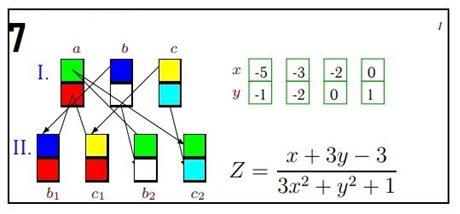

***Решение:***

In [9]:
def qZ(x, y):
    return (x + 3 * y - 3)/(3 * x ** 2 + y ** 2 + 1) 

X = [-5, -3, -2, 0]
Y = [-1, -2, 0, 1]

results = evoSteps(X, Y)

for i in range(len(results[2])):
    print(f'max_{i + 1}_step: {results[2][i][2]}')

qualityArrZ = []
for i in range(len(results[2])):
     qualityArrZ += results[2][i][3]

print(f'max Z: {max(qualityArrZ)}')

max_1_step: -0.9024725274725274
max_2_step: -4.968383340797134
max_3_step: -0.34338334079713384
max_4_step: -0.1683833407971339
max Z: 0.0


## 1.2. Теоретический материал – Метод имитации отжига

Алгоритм отжига – это метод оптимизации, который называется отжигом, или симуляцией восстановления (Simulated annealing). Как ясно из названия, метод поиска моделирует процесс восстановления. Восстановление – это физический процесс, который заключается в нагреве и последующем контролируемом охлаждении субстанции. В результате получается прочная кристаллическая структура, которая отличается от структуры с дефектами, образующейся при быстром беспорядочном охлаждении. Структура здесь представляет собой кодированное решение, а температура используется для того, чтобы указать, как и когда будут приниматься новые решения.  
Алгоритм имитации отжига включает следующие этапы:
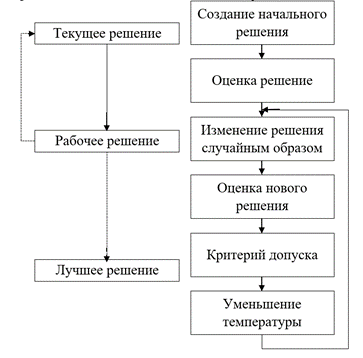
Метод отжига может быть эффективным при решении задач различных классов, требующих оптимизации. Ниже приводится их краткий список:
1. создание пути;
2. реконструкция изображения;
3. назначение задач и планирование;
4. размещение сети;
5. глобальная маршрутизация;
6. обнаружение и распознавание визуальных объектов;
7. разработка специальных цифровых фильтров.

Поскольку метод отжига представляет собой процесс генерации случайных чисел, поиск решения с использованием данного алгоритма может занять значительное время. В некоторых случаях алгоритм вообще не находит решение или выбирает не самое оптимальное. Алгоритм отжига как способ выполнения процедур поиска и оптимизации. Данный метод является аналогом процесса нагревания тела до состояния плавления с последующим постепенным охлаждением. При высоких температурах поиск ведется по всему диапазону. При снижении температуры диапазон поиска уменьшается до небольшой области вокруг текущего решения.

Рассмотрим решение задачи поиска оптимального маршрута на графе методом имитации отжига Для этого, представим формальную постановку задачи и рассмотрим пример, который иллюстрирует алгоритм решения.  
Итак, необходимо Найти длину гамильтонова цикла S_4 в полном графе K_6 после четырех циклов решения задачи методом отжига. Даны расстояния L_(i,j) между вершинами. Даны также: начальная последовательность вершин L_0, последовательность замен вершин Z и выпавшие при этом вероятности перехода P_k,k = 1,...,4.
Переход на худшее (∆S_k=S_k-S_(k-1)>0) решение допустим, если P_*=100где снижение температуры происходит по закону T_(k+1)=0.5T_k от T_1=100.

**1.2.1 Пример**

***Задача:***

Итак, начальные условия задачи представляют собой следующий граф с расстояниями между ребрами:
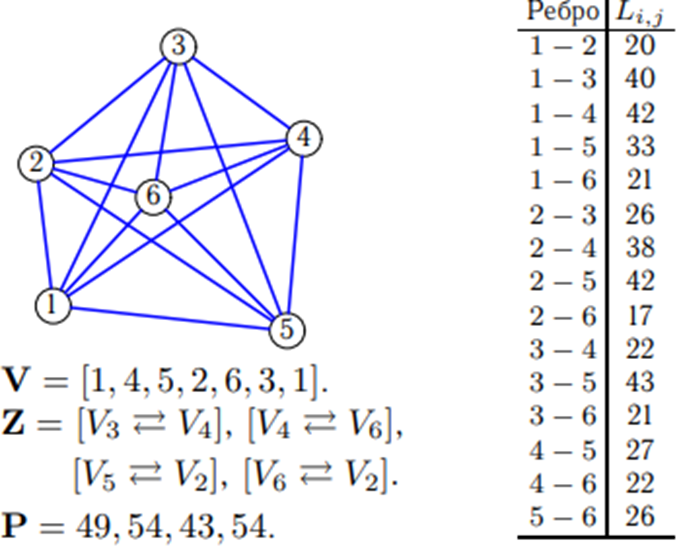

***Решение:***

In [10]:
import networkx as nx
import math as m

Импортируем библиотеки.  
Далее, опишем массив длин ребер, последовательности прохождение вершин на маршруте и их замены, значения P, а также начальную температуру:

In [11]:
distances = [(1, 2, 20),
            (1, 3, 40),
            (1, 4, 42),
            (1, 5, 33),
            (1, 6, 21),
            (2, 3, 26),
            (2, 4, 38),
            (2, 5, 42),
            (2, 6, 17),
            (3, 4, 22),
            (3, 5, 43),
            (3, 6, 21),
            (4, 5, 27),
            (4, 6, 22),
            (5, 6, 26)] # длины рёбер

V = [1, 4, 5, 2, 6, 3, 1] # последовательность прохождения маршрута
Z = [(3, 4),
     (4, 6),
     (5, 2),
     (6, 2)] # последовательность замен бершин
P = [49, 54, 43, 54] # случайные числа, выпавшие в процессе счёта

T = 100 # начальная температура

In [12]:
# Запишем функции вероятности и изменения температуры
def probability(delta, T):
    return 100 * m.e ** (-delta / T)

def reductTemp(prevT):
    return 0.5 * prevT

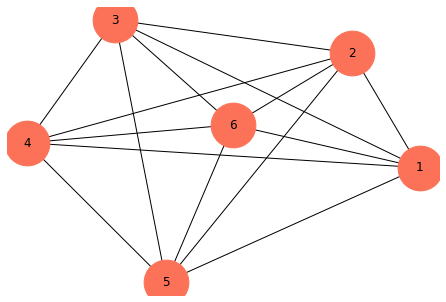

In [13]:
# Построим граф по заданным вершинам, как в начальном условии
graph = nx.Graph() # создание пустого графа
graph.add_weighted_edges_from(distances) # добавление весов ребер

# отрисовка графа с заданными вершинами
nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

Теперь, напишем необходимые, согласно алгоритму выше, функции для работы метода имитации отжига. 

In [14]:
# Вычислим длину ребра
def edgeLenght(i, j, distances, roundTrip = True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                    for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

In [15]:
# Вычислим длину маршрута
def routeLength(V, distances):
    edges = []
    
    for i in range(len(V) - 1):
        edges.append(edgeLenght(V[i], V[i + 1], distances))
    
    return sum(edges)

In [16]:
# одна перестановка в пути
def routeOneReplacement(arrV, Z, replacementByName=True):
    decrement = 1 if replacementByName else 0
    
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    
    return arrV

А теперь функцию, для реализации непосредственно самой перестановки:

In [17]:
# перестановки в пути
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

Теперь, опишем алгоритм выбора подходящего пути методом отжига:

In [18]:
# выбор нужного пути методом отжига
def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances) # нахождение длины пути
    arrSum = [sumLength] # массив сумм длин

    # циклы методом отжига
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i]) # новый маршрут после перестановки
        newS = routeLength(newV, distances) # длина нового маршрута
        arrSum.append(newS)
        deltaS = newS - sumLength # разница между длиной нового и старого маршрутов
    
        # в случае, если разница между длинами больше 0, то вычисляется вероятность
        if deltaS > 0:
            p = probability(deltaS, T) # подсчёт вероятности
        
            # если заданная вероятность попадает в интервал от 0 до р, то новый маршрут выб
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS
            
        T = reductTemp(T) # вычисление температуры
 
    return V, arrSum

И нарисуем наш граф, отвечающий заданному маршруту:

In [19]:
def drawRouteGraph(distances, bestRoute):
    newDistances = []
    # прохождение по вектору
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)
            
    graph = nx.Graph() # создание пустого графа
            
    graph.add_weighted_edges_from(newDistances) # добавление весов ребер
# отрисовка графа с заданными вершинами
    nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size = 2000, with_labels = True)

И, наконец, рассчитаем наилучший маршрут и его длину:

Лучший выбранный маршрут: [1, 6, 2, 3, 4, 5, 1]
Длина лучшего выбранного маршрута: 146
Длины всех рассмотренных маршрутов: [189, 209, 186, 146, 166]


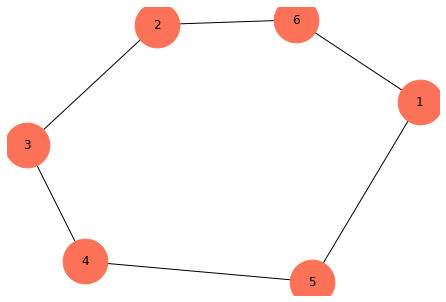

In [20]:
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute) # отрисовка лучшего маршрута

**Задание**

***Задача:***  

Найти длину гамильтонова цикла S4 в полном графе K6 после четырех циклов решения задачи методом отжига по вариантам ниже.
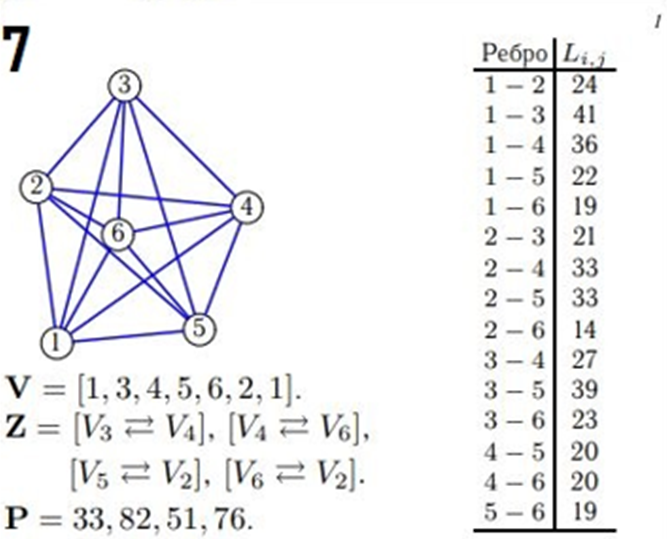


***Решение:***

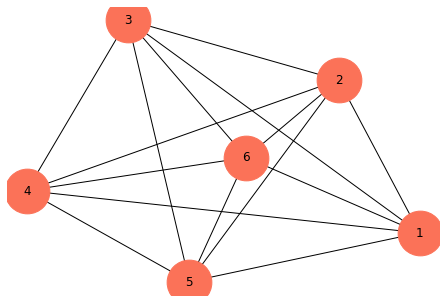

In [21]:
import networkx as nx
import math as m

distances = [(1, 2, 24),
            (1, 3, 41),
            (1, 4, 36),
            (1, 5, 22),
            (1, 6, 19),
            (2, 3, 21),
            (2, 4, 33),
            (2, 5, 33),
            (2, 6, 14),
            (3, 4, 27),
            (3, 5, 39),
            (3, 6, 23),
            (4, 5, 20),
            (4, 6, 20),
            (5, 6, 19)] # длины рёбер

V = [1, 3, 4, 5, 6, 2, 1] # последовательность прохождения маршрута
Z = [(3, 4),
     (4, 6),
     (5, 2),
     (6, 2)] # последовательность замен бершин
P = [33, 82, 51, 76] # случайные числа, выпавшие в процессе счёта

T = 100 # начальная температура

# Запишем функции вероятности и изменения температуры
def probability(delta, T):
    return 100 * m.e ** (-delta / T)

def reductTemp(prevT):
    return 0.5 * prevT

# Построим граф по заданным вершинам, как в начальном условии
graph = nx.Graph() # создание пустого графа
graph.add_weighted_edges_from(distances) # добавление весов ребер

# отрисовка графа с заданными вершинами
nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

Лучший выбранный маршрут: [1, 6, 5, 4, 3, 2, 1]
Длина лучшего выбранного маршрута: 130
Длины всех рассмотренных маршрутов: [145, 158, 183, 130, 146]


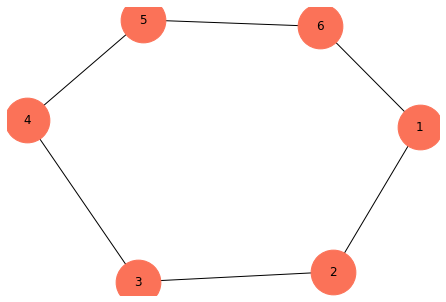

In [22]:
# Вычислим длину ребра
def edgeLenght(i, j, distances, roundTrip = True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                    for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])
    
# Вычислим длину маршрута
def routeLength(V, distances):
    edges = []
    
    for i in range(len(V) - 1):
        edges.append(edgeLenght(V[i], V[i + 1], distances))
    
    return sum(edges)

# одна перестановка в пути
def routeOneReplacement(arrV, Z, replacementByName=True):
    decrement = 1 if replacementByName else 0
    
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    
    return arrV

# перестановки в пути
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

# выбор нужного пути методом отжига
def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances) # нахождение длины пути
    arrSum = [sumLength] # массив сумм длин

    # циклы методом отжига
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i]) # новый маршрут после перестановки
        newS = routeLength(newV, distances) # длина нового маршрута
        arrSum.append(newS)
        deltaS = newS - sumLength # разница между длиной нового и старого маршрутов
    
        # в случае, если разница между длинами больше 0, то вычисляется вероятность
        if deltaS > 0:
            p = probability(deltaS, T) # подсчёт вероятности
        
            # если заданная вероятность попадает в интервал от 0 до р, то новый маршрут выб
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS
            
        T = reductTemp(T) # вычисление температуры
 
    return V, arrSum

def drawRouteGraph(distances, bestRoute):
    newDistances = []
    # прохождение по вектору
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)
            
    graph = nx.Graph() # создание пустого графа
            
    graph.add_weighted_edges_from(newDistances) # добавление весов ребер
# отрисовка графа с заданными вершинами
    nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size = 2000, with_labels = True)
    
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute) # отрисовка лучшего маршрута

**Задание**

***Задача:***  

На решенном уже примере поэкспериментируйте с показателем S, проанализируйте результаты.


***Решение:***

In [25]:
import itertools
from random import randint

distances = [(1, 2, 24),
            (1, 3, 41),
            (1, 4, 36),
            (1, 5, 22),
            (1, 6, 19),
            (2, 3, 21),
            (2, 4, 33),
            (2, 5, 33),
            (2, 6, 14),
            (3, 4, 27),
            (3, 5, 39),
            (3, 6, 23),
            (4, 5, 20),
            (4, 6, 20),
            (5, 6, 19)] # длины рёбер

V = [1, 3, 4, 5, 6, 2, 1] # последовательность прохождения маршрута
Z = [(3, 4),
     (4, 6),
     (5, 2),
     (6, 2)] # последовательность замен бершин
P = [30, 20, 50, 10] # случайные числа, выпавшие в процессе счёта
T = 100 # начальная температура

Лучший выбранный маршрут: [1, 4, 5, 2, 3, 6, 1]
Длина лучшего выбранного маршрута: 152
Длины всех рассмотренных маршрутов: [145, 158, 183, 155, 152]


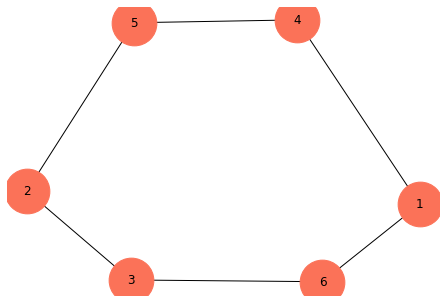

In [26]:
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute) # отрисовка лучшего маршрута